# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.

import pandas as pd
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

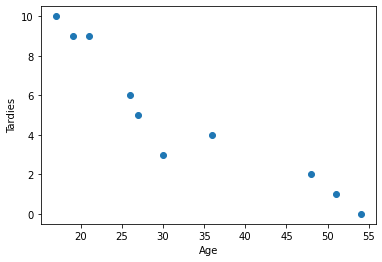

In [5]:
# Your code here.
import matplotlib.pyplot as plt

x = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

plt.scatter(x, y)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 

'''
We can see the is a linear relationship between age and lateness.  With the higher the age, the lower the lateness

'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
# Your response here.
#correlation:
student_data.corr()

#Here we can see Tardies(lateness) is heavily negatively correlated with Age

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [11]:
#covariance:

import numpy as np
np.cov(x,y)

#how muc one variance influences the other variance. In this case we can see that the bigger the values of x the dsmaller the variance of values in y

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here.

from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [24]:
import statsmodels.api as sm
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

In [19]:
X = student_data[['Age']]
Y = student_data['Tardies']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

C:\Users\chris\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           5.57e-05
Time:                        13:29:14   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from scipy.stats import f_oneway

In [17]:
'''The outcome variable will be 'Tardies' as we are looking to see how age effects it

'''

Plot your regression model on your scatter plot.

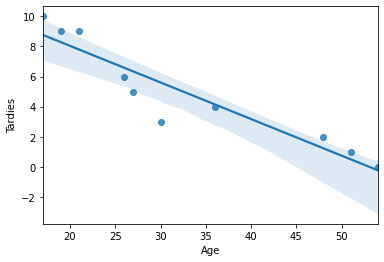

In [26]:
# Your code here.

import seaborn as sns


sns.regplot(x="Age", y="Tardies", data=student_data);


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
'''
The P value is 0 or close to 0, meaning there is an extremely high correlation /cannot reject the null hypothesis (as lower than 0.05 = statistically significant)
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
# Import any libraries you may need & the data

#read the dataset and store as a variable
vehicles_df = pd.read_csv("vehicles.csv") 

#create a dataframe from the variable
vehicles_df = pd.DataFrame(vehicles_df)

#display the dataframe to check it looks correct
vehicles_df



,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
# Your response here. 
corr_matrix = vehicles_df.corr()
corr_matrix

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [ ]:
'''
I believe the fuel barrels per year is the most important contributor

'''

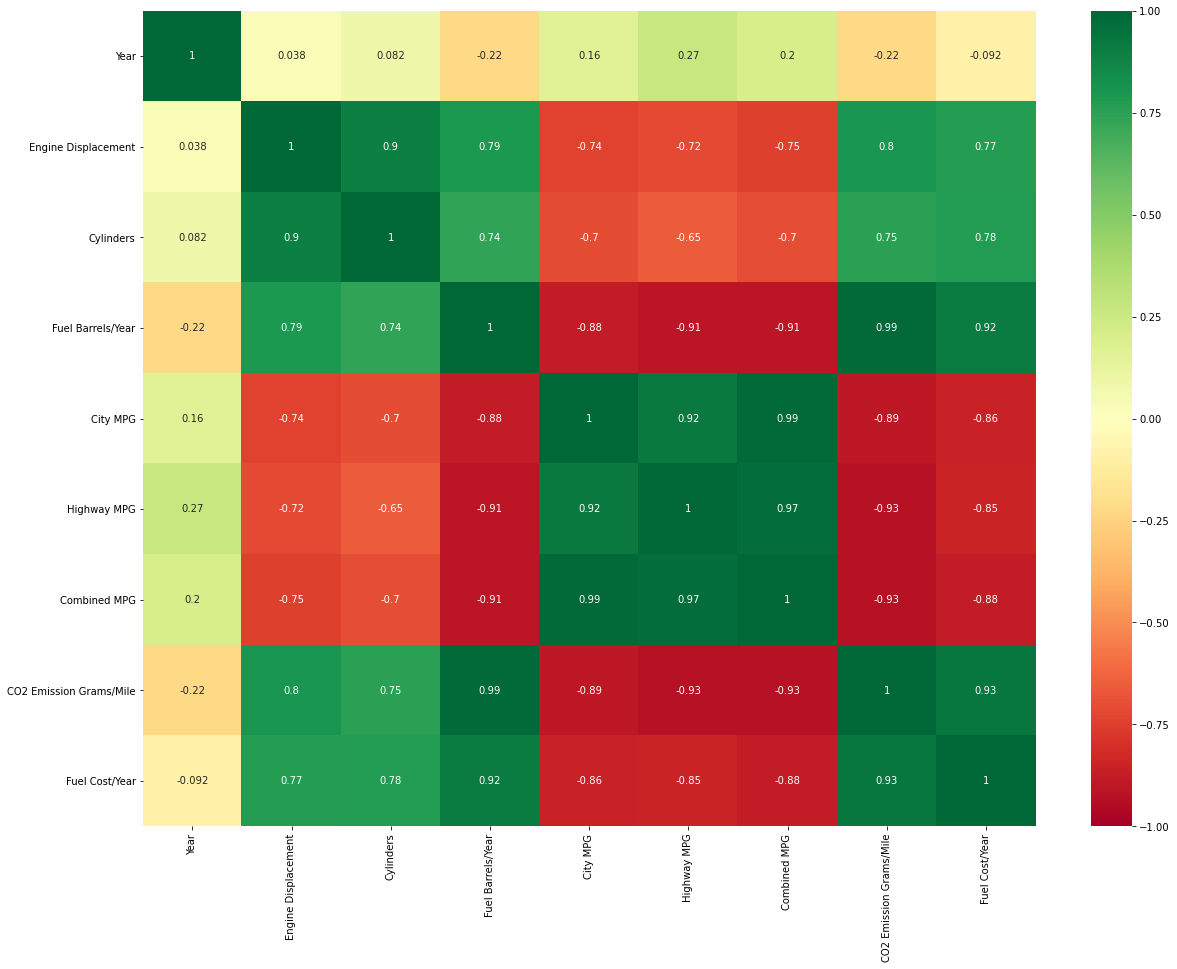

In [30]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(corr_matrix, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

In [32]:
vehicles_df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [39]:
# Your response here. 
X = vehicles_df[['Fuel Barrels/Year', 'Engine Displacement']]
Y = vehicles_df['CO2 Emission Grams/Mile']
X = sm.add_constant(X)
results2 = sm.OLS(Y, X).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.974
Method:                      Least Squares   F-statistic:                 6.783e+05
Date:                     Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:57:31   Log-Likelihood:            -1.5712e+05
No. Observations:                    35952   AIC:                         3.142e+05
Df Residuals:                        35949   BIC:                         3.143e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.6172      0.424     41.522      0.000      16.786      18.449
Fuel Barrels/Year      24.9034      0.037    676.414      0.000      24.831      24.976
Engine Displacement     5.7432      0.121     47.469      0.000       5.506       5.980
==============================================================================
Omnibus:                    85106.861   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        746501949.219
Skew:                          24.215   Prob(JB):                         0.00
Kurtosis:                     707.263   Cond. No.                         78.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [40]:
# Your code here.


import pandas as pd
party_data = pd.DataFrame({'Invited': [1, 3, 4, 6, 8, 9, 11, 14], 'Attended': [1, 2, 4, 4, 5, 7, 8, 13]})

party_data

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

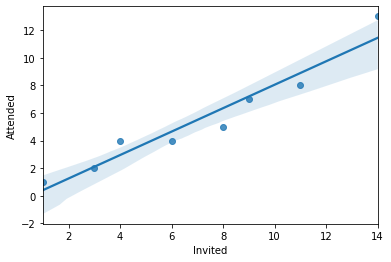

In [42]:
# Your code here.
import seaborn as sns


sns.regplot(x="Invited", y="Attended", data=party_data);


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [43]:
# Your response here. 

'''
We can see the results are positively correlated, so the more people are invited, the more that attend on average
'''

X = party_data[["Invited"]]
Y = party_data["Attended"]
X = sm.add_constant(X)
results3 = sm.OLS(Y, X).fit()
results3.summary()




C:\Users\chris\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Attended   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           0.000102
Time:                        14:02:22   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
Invited        0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
ln.fit(X, Y)
print(ln.intercept_)

-0.4393939393939412


In [50]:
ln.fit(X,Y)

LinearRegression()

In [52]:
predicitons = ln.predict(X)
errors = predicitons - Y
errors

# there are negative values that are weighing down the average - so if I remove them to get a clearer average

0   -0.590909
1    0.106061
2   -1.045455
3    0.651515
4    1.348485
5    0.196970
6    0.893939
7   -1.560606
Name: Attended, dtype: float64

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [56]:
# Your response here. 
##take out 0, 2 & 7 as they lead to the negative values
new_x = [3, 6, 8, 9, 11, 14]
new_y = [2, 4, 5, 7, 8, 13]



new_party_data = pd.DataFrame({'Invited': [3, 6, 8, 9, 11, 14], 'Attended': [2, 4, 5, 7, 8, 13]})


X = new_party_data [["Invited"]]
Y = new_party_data ["Attended"]
X = sm.add_constant(X)
results4 = sm.OLS(Y, X).fit()
results4.summary()

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Attended   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     70.51
Date:                Sat, 16 Jan 2021   Prob (F-statistic):            0.00110
Time:                        14:25:22   Log-Likelihood:                -7.2561
No. Observations:                   6   AIC:                             18.51
Df Residuals:                       4   BIC:                             18.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7687      1.065     -1.661      0.172      -4.725       1.188
Invited        0.9728      0.116      8.397      0.001       0.651       1.294
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.033
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.517
Skew:                           0.089   Prob(JB):                        0.772
Kurtosis:                       1.572   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
''' We can see the R-Squared Value has increased so it is better fitted for a regression model,
however the P-Value has increased, showing the reliability measured by statistical significance has decreased
'''

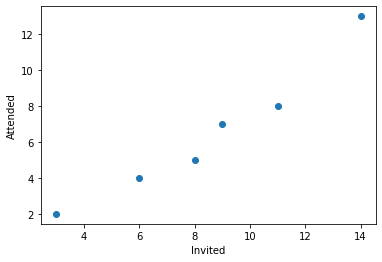

In [60]:
import matplotlib.pyplot as plt

new_x = [3, 6, 8, 9, 11, 14]
new_y = [2, 4, 5, 7, 8, 13]
plt.scatter(new_x, new_y)
plt.xlabel("Invited")
plt.ylabel("Attended")
plt.show()

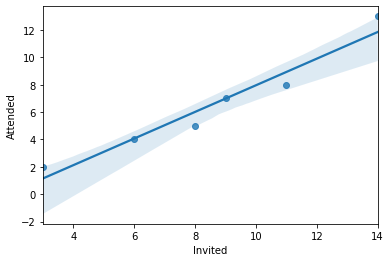

In [61]:
import seaborn as sns


sns.regplot(x="Invited", y="Attended", data=new_party_data);

In [ ]:
# We can see more points fit withing the blue